# Qiskit Certification Prep - Module 2.1: Visualize Quantum Circuits

In [1]:
import qiskit
import numpy as np
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)

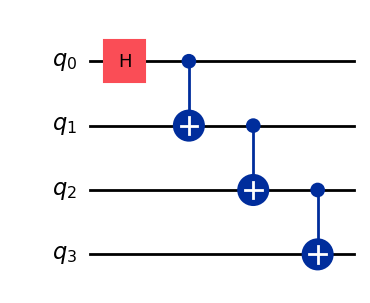

In [3]:
qc.draw('mpl')

In [4]:
qc.depth()

4

In [5]:
#  Bell States

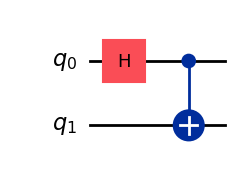

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

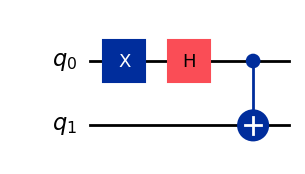

In [7]:
qc = QuantumCircuit(2)

qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

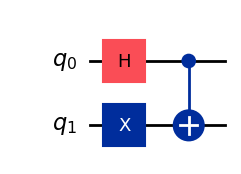

In [8]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

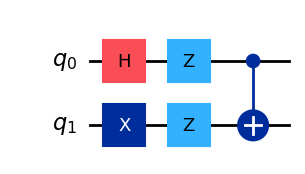

In [9]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.z(0)
qc.z(1)
qc.cx(0,1)
qc.draw('mpl')

In [10]:
from qiskit import QuantumCircuit

def bell_phi_plus():
    """|Φ+> = (|00> + |11>)/√2"""
    qc = QuantumCircuit(2, name="Φ+")
    qc.h(0)
    qc.cx(0, 1)
    return qc

def bell_phi_minus():
    """|Φ-> = (|00> - |11>)/√2"""
    qc = QuantumCircuit(2, name="Φ-")
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)        # add a phase flip
    return qc

def bell_psi_plus():
    """|Ψ+> = (|01> + |10>)/√2"""
    qc = QuantumCircuit(2, name="Ψ+")
    qc.h(0)
    qc.cx(0, 1)
    qc.x(1)        # swap the populations
    return qc

def bell_psi_minus():
    """|Ψ-> = (|01> - |10>)/√2"""
    qc = QuantumCircuit(2, name="Ψ-")
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)        # phase flip
    qc.x(1)        # swap the populations
    return qc

# Example: view text diagrams
for maker in [bell_phi_plus, bell_phi_minus, bell_psi_plus, bell_psi_minus]:
    # print(maker().__class__.__name__, maker().__name__)
    print(maker().draw('text'))


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘     
     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ X ├
          └───┘└───┘
     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├
     └───┘┌─┴─┐├───┤
q_1: ─────┤ X ├┤ X ├
          └───┘└───┘


In [11]:
from qiskit import QuantumCircuit

# example circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# --- OpenQASM 3 round-trip ---
from qiskit.qasm3 import dumps, loads, load

qasm3_str = dumps(qc)                # serialize to OpenQASM 3. Returns a string
print(qasm3_str, "...\n")      # preview

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c;
qubit[2] q;
h q[0];
cx q[0], q[1];
c[0] = measure q[0];
c[1] = measure q[1];
 ...



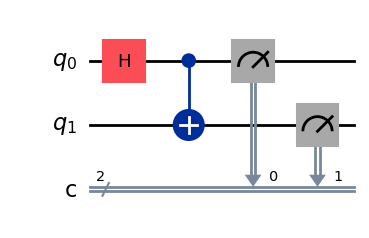

In [12]:
qc_from_qasm3 = loads(qasm3_str)     # parse back into a QuantumCircuit

# visualize (mpl requires matplotlib)
qc_from_qasm3.draw("mpl")


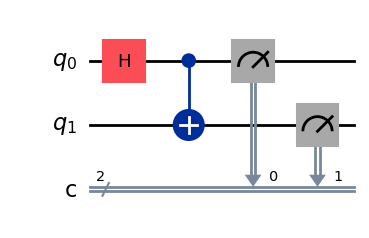

In [13]:
qc_from_qasm3 = load('myfile.qasm')     # parse back into a QuantumCircuit

# visualize (mpl requires matplotlib)
qc_from_qasm3.draw("mpl")


In [26]:
from qiskit.quantum_info import Statevector, DensityMatrix, SparsePauliOp, partial_trace
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector

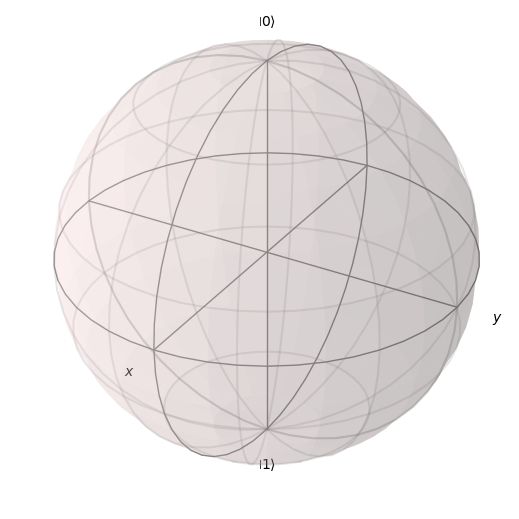

In [27]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
sv = Statevector.from_instruction(qc)
sv_1 = partial_trace(DensityMatrix(sv), [0])
x=float(np.real(sv_1.expectation_value(SparsePauliOp('X'))))
y=float(np.real(sv_1.expectation_value(SparsePauliOp('Y'))))
z=float(np.real(sv_1.expectation_value(SparsePauliOp('Z'))))
plot_bloch_vector([x,y,z])

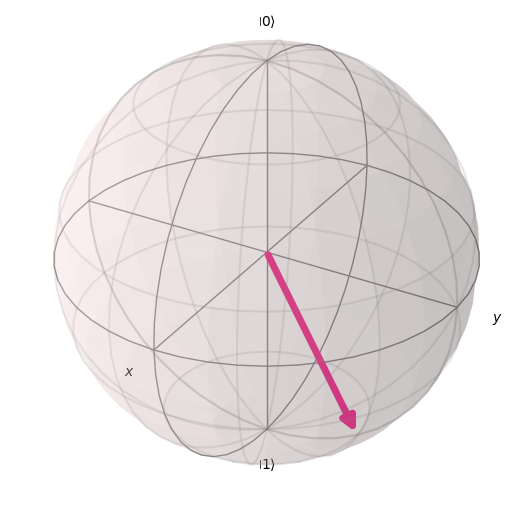

In [28]:
qc = QuantumCircuit(2)
qc.x(1)
qc.rx(np.pi/6, 1)
sv = Statevector.from_instruction(qc)
sv_1 = partial_trace(DensityMatrix(sv), [0])
x=float(np.real(sv_1.expectation_value(SparsePauliOp('X'))))
y=float(np.real(sv_1.expectation_value(SparsePauliOp('Y'))))
z=float(np.real(sv_1.expectation_value(SparsePauliOp('Z'))))
plot_bloch_vector([x,y,z])

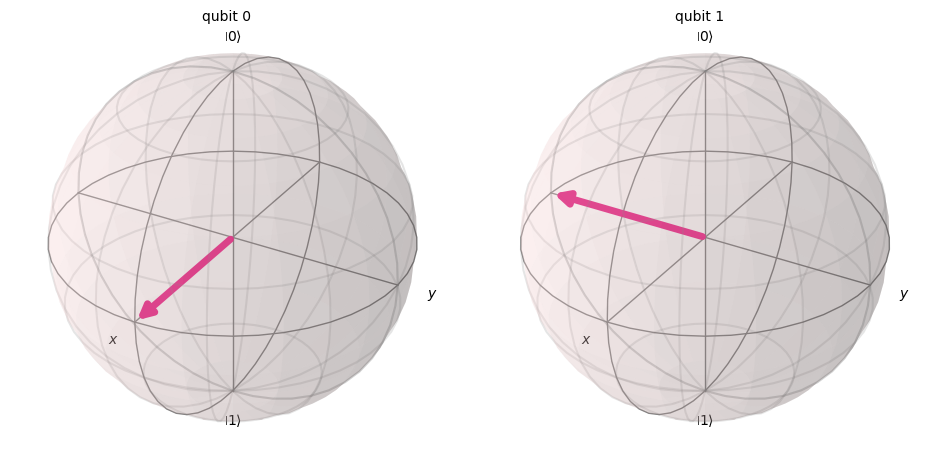

In [29]:

qc = QuantumCircuit(2)
qc.h(0)
qc.rx(np.pi/2, 1)
sv = Statevector.from_instruction(qc)
plot_bloch_multivector(sv)